In [36]:
# 常见的构造tensor的方法
import numpy as np
import torch

sizes = 10
a = torch.Tensor(sizes)
b = torch.tensor([x for x in range(5)])
c = torch.arange(1, 10, 1)
d = torch.linspace(1, 10, 10)
e = torch.rand(sizes)
f = torch.randn(sizes)
# g = torch.normal(0.0, 1.0, (10))
h = torch.randperm(10)  # 返回一个0~n-1的随机打散数组

print(f'a:{a}\n b:{b}\n c:{c}\n d:{d}\n e:{e}\n f:{f}\n h:{h}\n')
print(f'e.tolist(): {e.tolist()}')


a:tensor([9.8091e-45, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.4714e-43,
        2.1178e+23, 3.3089e-09, 2.0431e+20, 4.3202e-05])
 b:tensor([0, 1, 2, 3, 4])
 c:tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
 d:tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])
 e:tensor([6.0194e-01, 5.7693e-01, 3.6471e-01, 9.0167e-02, 7.0346e-01, 9.4514e-01,
        4.3187e-01, 5.8842e-04, 4.6398e-01, 6.2322e-01])
 f:tensor([ 0.1874,  0.3492, -0.6279, -0.4500,  0.1530,  0.9511, -1.3332,  0.0252,
         2.4451,  0.0122])
 h:tensor([0, 2, 6, 1, 8, 4, 9, 3, 7, 5])

e.tolist(): [0.601943850517273, 0.5769340991973877, 0.36471396684646606, 0.09016704559326172, 0.7034599184989929, 0.9451441764831543, 0.4318694472312927, 0.0005884170532226562, 0.46398448944091797, 0.623222827911377]


tensor([[0.9553, 0.1800, 0.4101, 0.0611],
        [0.6237, 0.3271, 0.7242, 0.5142]])

In [35]:
# 自动求导
from __future__ import print_function

a = torch.tensor(2, requires_grad=True, dtype=torch.float32)
b = torch.tensor(3, requires_grad=True, dtype=torch.float32)
c = a + b
print(a, b, c)
print(a.grad, b.grad, c.grad)
print(a.grad_fn, b.grad_fn, c.grad_fn)

c.backward()
print('*' * 50)
print(a, b, c)
print(a.grad, b.grad, c.grad)
print(a.grad_fn, b.grad_fn, c.grad_fn)
c.backward()


tensor(2., requires_grad=True) tensor(3., requires_grad=True) tensor(5., grad_fn=<AddBackward0>)
None None None
None None <AddBackward0 object at 0x7fc93916fe10>
**************************************************
tensor(2., requires_grad=True) tensor(3., requires_grad=True) tensor(5., grad_fn=<AddBackward0>)
tensor(1.) tensor(1.) None
None None <AddBackward0 object at 0x7fc938e566d0>


## 练习，利用pytorch实现简单的全连接神经网络

该神经网络包含一个输入层，一个中间隐藏层和一个输出层，隐藏层的激活函数选用relu，输出层的激活函数为线性激活函数
输入层维度：input_dim
隐藏层维度：hidden_dim
输出层维度:out_dim


In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist



In [6]:
class CreateDataSet(object):
    def oracle(self, x, landmarks):
        dists = cdist(x, landmarks, metric='euclidean')
        d1 = dists.max(axis=1)
        d2 = dists.min(axis=1)
        return d1 * d2

    def oracle_classification(self, X, pos_landmarks, neg_landmarks):
        pos_value = self.oracle(X, pos_landmarks)
        neg_value = self.oracle(X, neg_landmarks)
        y_ = (pos_value <= neg_value).astype(int)
        y = np.zeros((y_.shape[0], 2))
        y[np.arange(y.shape[0]), y_] = 1
        return y

    def make_dataset_classification(self, size=100, complexity=2, ndim=3, return_landmarks=False):
        data_mtx = np.random.rand(size, ndim)
        pos_landmarks = np.random.rand(complexity, ndim)
        neg_landmarks = np.random.rand(complexity, ndim)
        y = self.oracle_classification(data_mtx, pos_landmarks, neg_landmarks)
        if return_landmarks:
            return data_mtx, y, pos_landmarks, neg_landmarks
        else:
            return data_mtx, y

    def make_2d_grid_dataset_classification(self, size, pos_landmarks, neg_landmarks):
        x = np.linspace(0.0, 1.0, int(size ** 0.5))
        y = np.linspace(0.0, 1.0, int(size ** 0.5))
        xx, yy = np.meshgrid(x, y)
        z = np.dstack((xx, yy))
        data_mtx = z.reshape(-1, 2)
        y = self.oracle_classification(data_mtx, pos_landmarks, neg_landmarks)
        return data_mtx, y

    def plot_2d_classification(self, X_test, y_test, preds, pos_landmarks, neg_landmarks):
        y_test = np.argmax(y_test, axis=1)
        preds = np.argmax(preds, axis=1)
        acc = np.sum(y_test == preds) / y_test.shape[0]
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
        fig.set_size_inches(18, 7)
        ax1.set_title("Prediction")
        ax2.set_title("Truth")
        ax3.set_title(f"Comparsion acc:{acc}")

        ax1.scatter(X_test[:, 0], X_test[:, 1], c=preds, marker='o', cmap=plt.cm.coolwarm, alpha=0.2)
        ax1.scatter(pos_landmarks[:, 0], pos_landmarks[:, 1], s=200, c='b', marker='*', alpha=0.65)
        ax1.scatter(neg_landmarks[:, 0], neg_landmarks[:, 1], s=200, c='r', marker='*', alpha=0.65)

        ax2.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', cmap=plt.cm.coolwarm, alpha=0.2)
        ax2.scatter(pos_landmarks[:, 0], pos_landmarks[:, 1], s=200, c='b', marker='*', alpha=0.65)
        ax2.scatter(neg_landmarks[:, 0], neg_landmarks[:, 1], s=200, c='r', marker='*', alpha=0.65)

        ax3.scatter(X_test[:, 0], X_test[:, 1], c=preds, marker='o', cmap=plt.cm.coolwarm, alpha=0.2)
        ax3.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', cmap=plt.cm.coolwarm, alpha=0.2)
        ax3.scatter(pos_landmarks[:, 0], pos_landmarks[:, 1], s=200, c='b', marker='*', alpha=0.65)
        ax3.scatter(neg_landmarks[:, 0], neg_landmarks[:, 1], s=200, c='r', marker='*', alpha=0.65)
        plt.show()


In [7]:
class ExerciseNet(object):
    def __init__(self, input_dim, hidden_dim, out_dim, is_bias=True):
        '''
        :param input_dim: 输入向量维度
        :param hidden_dim: 中间层维度
        :param out_dim: 输出向量维度
        :param is_bias: 是否有bias
        '''
        self.model = self._init_model_paramers_(input_dim, hidden_dim, out_dim, is_bias)
        self.is_bias = is_bias
        self.official_loss = torch.nn.CrossEntropyLoss()

    def _init_model_paramers_(self, input_dim, hidden_dim, out_dim, is_bias):
        '''
        :param input_dim: 输入向量维度
        :param hidden_dim: 中间层维度
        :param out_dim: 输出向量维度
        :param is_bias: 是否有bias
        :return: 一个字典，其值为模型的参数矩阵
        '''
        model = dict()
        if is_bias:
            model['Wh'] = torch.rand(size=(hidden_dim, input_dim + 1), requires_grad=True)
            model['Wo'] = torch.rand(size=(out_dim, hidden_dim + 1), requires_grad=True)
        else:
            model['Wh'] = torch.rand(size=(hidden_dim, input_dim), requires_grad=True)
            model['Wo'] = torch.rand(size=(out_dim, hidden_dim), requires_grad=True)
        return model

    def _relu_(self, x):
        '''
        :param x: 输入矩阵，行表示样本个数，列表示维度
        :return: relu激活函数运算后的值
        '''
        out = x.clone()
        out[out < 0] = 0
        return out

    def _softmax_(self, x):
        '''
        :param x: 输入矩阵，行表示样本个数，列表示维度
        :return: softmax运算后的值
        '''
        x = x - torch.max(x)
        return torch.exp(x) / torch.sum(torch.exp(x), dim=1).view(-1, 1)

    def _crossentropy_loss(self, y, t):
        '''
        :param y: 样本的预测值，行表示样本个数，列表示样本在各个类别上的概率分布
        :param t: 样本真实标签，行表示样本个数，列是一个one-hot向量
        :return: 批样本的交叉熵损失
        '''
        y = self._softmax_(y)
        return -torch.sum(t * torch.log(y + 1e-7))

    def _update_weights_(self, lr):
        '''
        :param lr: 学习率
        :return: None
        '''
        for key in self.model.keys():
            self.model[key].data -= lr * self.model[key].grad

    def _zero_grad_(self):
        '''
        将梯度置为0
        '''
        for key in self.model.keys():
            self.model[key].grad = None

    def forward(self, x):
        '''
        前向传播计算
        :param x: T行input_dim列，T表示样本的个数，input_dim表示样本的维度
        :return: 全连接网络的输出值，有T行out_dim列
        '''
        if self.is_bias:
            x = torch.cat((x, torch.ones(x.size()[0], 1)), dim=1)
            h_values = torch.mm(self.model['Wh'], x.t())
            h_values = self._relu_(h_values)
            h_values = torch.cat((h_values, torch.ones(1, h_values.size()[1])), dim=0)  # h_values增一维
            out = torch.mm(self.model['Wo'], h_values)
        else:
            h_values = torch.mm(self.model['Wh'], x.t())
            h_values = self._relu_(h_values)
            out = torch.mm(self.model['Wo'], h_values)
        return out.t()

    def _train_(self, x_train, y_train, batch_size=16, lr=0.01):
        '''
        训练一轮网络
        :param x_train: 输入特征, 行表示样本个数，列表示样本维度
        :param y_train: 真实标签，行表示样本个数，列为one-hot向量
        :param batch_size: 批大小
        :param lr: 学习率
        :return: 当前批训练的平均loss
        '''
        index_arr = torch.randperm(x_train.size()[0])
        total_loss = []
        for step in range(0, x_train.size()[0], batch_size):
            begin, end = step, min(step + batch_size, x_train.size()[0])
            batch_index = index_arr[begin:end]
            y_pred = self.forward(x_train[batch_index])
            loss = self.loss(y_pred, y_train[batch_index])
            self._zero_grad_()
            loss.backward()
            self._update_weights_(lr=lr)
            total_loss.append(loss.item())
        return np.mean(np.array(total_loss))

    def train(self, x_train, y_train, batch_size=16, lr=0.01, epochs=20, loss_type='custom'):
        '''
        训练多轮网络
        :param x_train: 输入特征, 行表示样本个数，列表示样本维度
        :param y_train: 真实标签，行表示样本个数，列为one-hot向量
        :param batch_size: 批大小
        :param lr: 学习率
        :param epochs: 学习轮次
        :param loss_type: 使用何种交叉熵loss，值为custom使用自定义的loss，否则使用官方库定义的loss
        :return: None
        '''
        if loss_type == 'custom':
            self.loss = self._crossentropy_loss
            print(f'use loss: {self.loss.__name__}')
        else:
            self.loss = self.official_loss
            print(f'use loss: {type(self.loss).__name__}')
        x_train, y_train = torch.tensor(x_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)
        for epoch in range(epochs):
            loss = self._train_(x_train, y_train, batch_size=batch_size, lr=lr)
            print(f'epoch:{epoch}, loss:{loss}')

    def test(self, x_test, y_test):
        '''
        测试网络效果，评估指标为准确率
        :param x_test: 输入特征, 行表示样本个数，列表示样本维度
        :param y_test: 真实标签，行表示样本个数，列为one-hot向量
        :return: None
        '''
        with torch.no_grad():
            x_test, y_test = torch.tensor(x_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)
            y_pred = self.forward(x_test)
            y_pred = torch.argmax(y_pred, dim=1)
            acc = torch.sum(y_pred == torch.argmax(y_test, dim=1)) / y_test.size()[0]
            print(f'acc: {acc}')

    def pred(self, x_test):
        '''
        用训练好的模型做预测
        :param x_test: 输入特征, 行表示样本个数，列表示样本维度
        :return: 预测矩阵，行表示样本个数，列为样本在类别上面的概率分布
        '''
        with torch.no_grad():
            x_test = torch.tensor(x_test, dtype=torch.float32)
            y_pred = self.forward(x_test)
            return y_pred.numpy()


use loss: _crossentropy_loss
epoch:0, loss:9.620603962948447
epoch:1, loss:7.177301444505391
epoch:2, loss:3.3117679796720805
epoch:3, loss:4.876539581700375
epoch:4, loss:3.4579469843914636
epoch:5, loss:2.9934342299637042
epoch:6, loss:3.382927706367091
epoch:7, loss:3.1575899782933687
epoch:8, loss:2.5715319294678536
epoch:9, loss:3.6945776813908626
acc: 0.8926611542701721


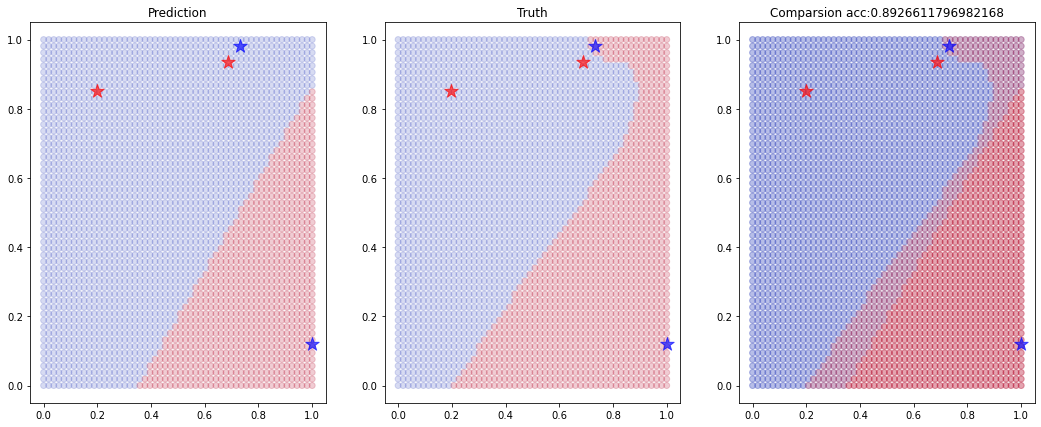

In [8]:
data_set = CreateDataSet()
x_train, y_train, pos_landmarks, neg_landmarks = data_set.make_dataset_classification(size=300, complexity=2,
                                                                                      ndim=2, return_landmarks=True)
x_test, y_test = data_set.make_2d_grid_dataset_classification(3000, pos_landmarks, neg_landmarks)
net = ExerciseNet(2, 5, 2)
net.train(x_train, y_train, lr=0.05, epochs=10, loss_type='custom')
net.test(x_test, y_test)
preds = net.pred(x_test)
data_set.plot_2d_classification(x_test, y_test, preds, pos_landmarks, neg_landmarks)